Fisrt import modules needed for Gaussian Process

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern,ConstantKernel

Define objective function below

In [2]:
def f(x):
    return -1*2*np.sin(x+1)*x

Prepare sample data

In [3]:
x=np.linspace(-10,10,100) #search range
#new point for further prediction
x_new=np.linspace(-10,10,100).reshape(100,1)
#sample (I include edge points in samples)
x_=20*np.random.rand(4,1)-10
x_=np.vstack((np.array(-10),np.array(10),x_))
y_=f(x_)

Define a function to plot confidence area, mean function, and sample points

In [4]:
def plot_gaussian(x_sample,y_sample,x_new,mu,std):
    fig,ax=plt.subplots()
    plt.plot(x_new,mu,'-',color='b',label='mean')
    plt.plot(x_new,mu+2*std,'-',color='b',linewidth=0.5,label='confidence')
    plt.plot(x_new,mu-2*std,'-',color='b',linewidth=0.5)
    ax.fill_between(x,mu+2*std,mu-2*std,color='grey')
    plt.scatter(x_sample,y_sample,s=50,c='k',marker='*',label='sample')


Gaussian process regressor setting

In [5]:
#covariance function amplitude
theta0=ConstantKernel(np.random.rand(1)*5**2) 
#define kernel
Sqrexp=RBF(length_scale=1) #Squared Exponential(RBF)
Matern52=Matern(length_scale=1,nu=2.5) #Matern52
#gaussian process regressor
gpr=GaussianProcessRegressor(kernel=theta0*Sqrexp)


Fit the regressor with sample data.

Plot the prediction mean and variance.

Compare it with the true function.

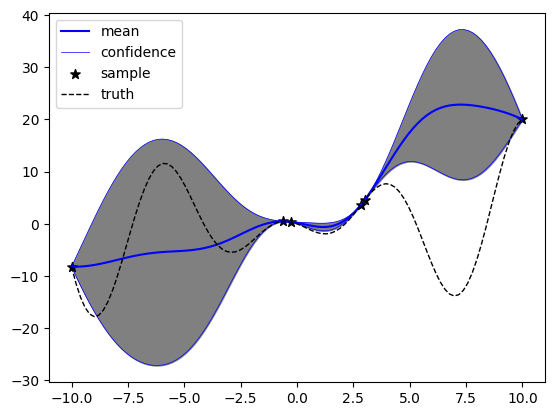

In [6]:
gpr.fit(x_,y_)
mu,std=gpr.predict(x_new,return_std=True)
plot_gaussian(x_,y_,x_new,mu,std)
plt.plot(x,f(x),'k--',label='truth',linewidth=1)
plt.legend(loc='upper left')


Add a point arbitrarily and observe the difference

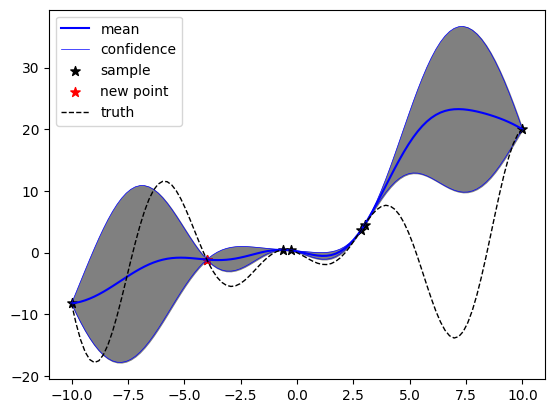

In [7]:
new_point=np.array(-4)
x_=np.vstack((x_,new_point))
y_=np.vstack((y_,f(new_point)))
gpr.fit(x_,y_)
mu1,std1=gpr.predict(x_new,return_std=True)
plot_gaussian(x_,y_,x_new,mu1,std1)
plt.scatter(new_point,f(new_point),s=50,c='r',label='new point',marker='*')
plt.plot(x,f(x),'k--',label='truth',linewidth=1)
plt.legend(loc='upper left')


Add a point arbitrarily again

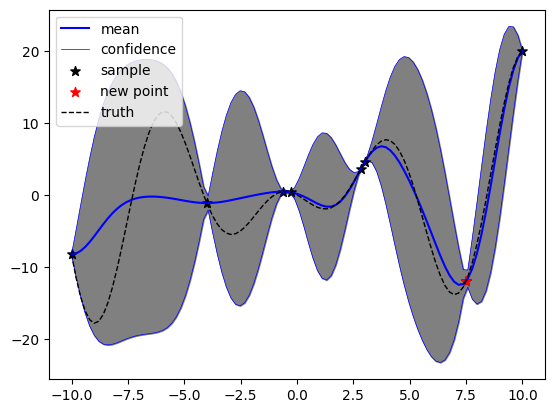

In [8]:
new_point=np.array(7.5)
x_=np.vstack((x_,new_point))
y_=np.vstack((y_,f(new_point)))
gpr.fit(x_,y_)
mu2,std2=gpr.predict(x_new,return_std=True)
plot_gaussian(x_,y_,x_new,mu2,std2)
plt.scatter(new_point,f(new_point),s=50,c='r',label='new point',marker='*')
plt.plot(x,f(x),'k--',label='truth',linewidth=1)
plt.legend(loc='upper left')

Draw prediction samples at x=3.5

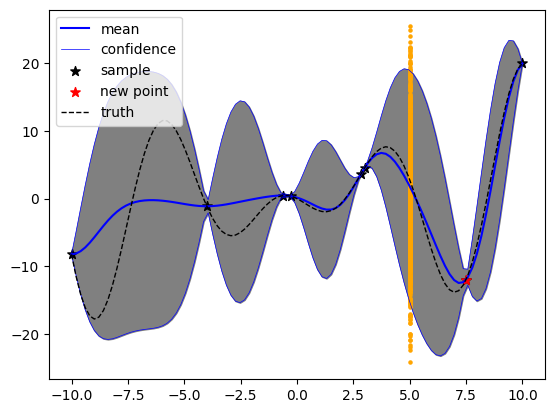

In [11]:
n_sample=1000
y_pred=gpr.sample_y(X=np.array(5).reshape(1,1),n_samples=n_sample)
plot_gaussian(x_,y_,x_new,mu2,std2)
plt.scatter(new_point,f(new_point),s=50,c='r',label='new point',marker='*')
plt.plot(x,f(x),'k--',label='truth',linewidth=1)
plt.legend(loc='upper left')
plt.scatter(5*np.ones((1,n_sample)),y_pred,s=5,c='orange')

Counting the occurance of function value and plot the histogram.

Text(0, 0.5, 'occurance')

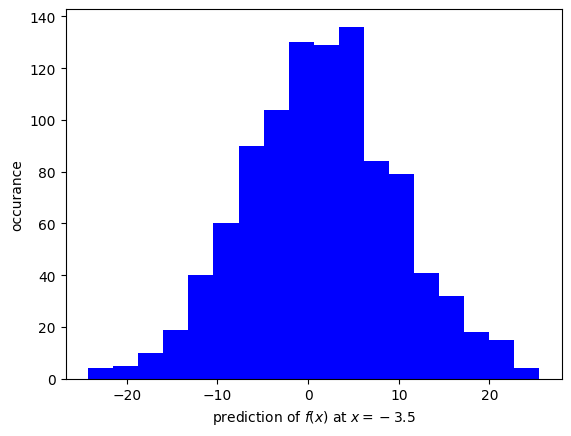

In [12]:

plt.hist(y_pred.reshape(n_sample,1),bins=18,color='b')
plt.xlabel("prediction of $f(x)$ at $x=-3.5$")
plt.ylabel('occurance')